# Manipulating the field of view

There are a few utility transforms that can be used to manipulate the 
shape of a tensor.

First, let us download an example image

In [1]:
!pushd $TMPDIR \
&& wget -nc https://github.com/voxelmorph/voxelmorph/raw/dev/data/test_scan.npz -O test_scan.npz \
&& popd

/home/scratch /autofs/space/pade_001/users/yb947/code/yb/cornucopia/docs/examples
File ‘test_scan.npz’ already there; not retrieving.


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from cornucopia import fov, RelabelTransform
import os

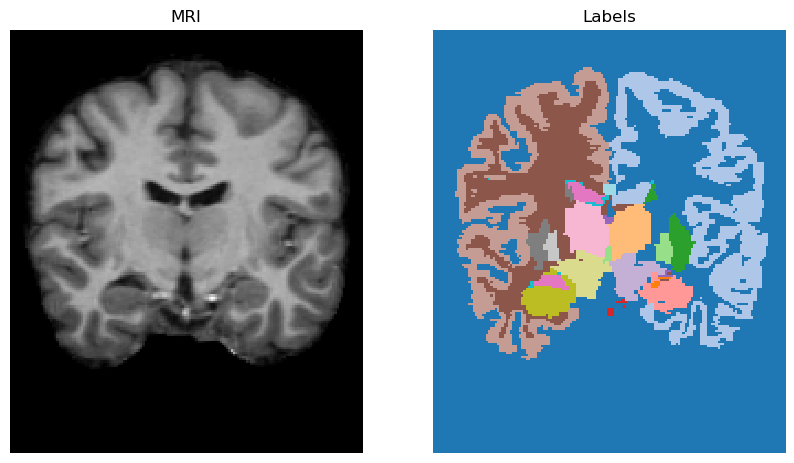

In [3]:
fname = os.path.join(os.environ['TMPDIR'], 'test_scan.npz')
npz = np.load(fname)
dat = torch.as_tensor(npz['vol'][:, :, 112]).T[None]
lab = torch.as_tensor(npz['seg'][:, :, 112]).T[None]
lab = RelabelTransform()(lab)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(dat.squeeze(), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('MRI')
plt.subplot(1, 2, 2)
plt.imshow(lab.squeeze(), cmap='tab20', interpolation='nearest')
plt.axis('off')
plt.title('Labels')
plt.show()

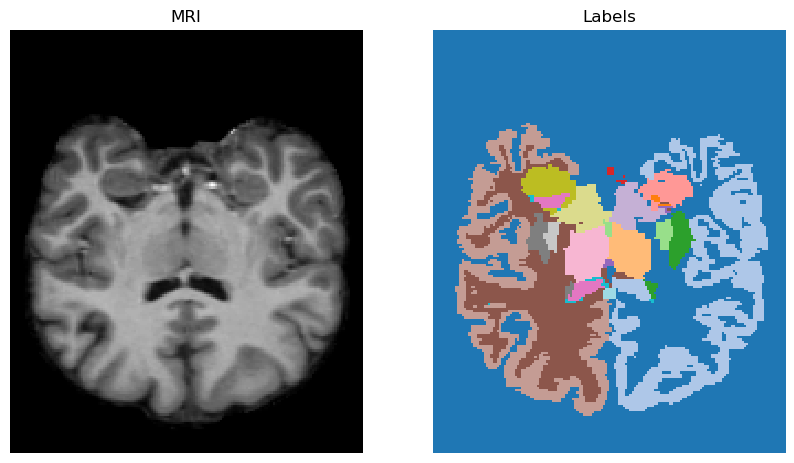

In [4]:
# flip first axis

xform = fov.FlipTransform(1)
flip_dat, flip_lab = xform(dat, lab)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(flip_dat.squeeze(), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('MRI')
plt.subplot(1, 2, 2)
plt.imshow(flip_lab.squeeze(), cmap='tab20', interpolation='nearest')
plt.axis('off')
plt.title('Labels')
plt.show()

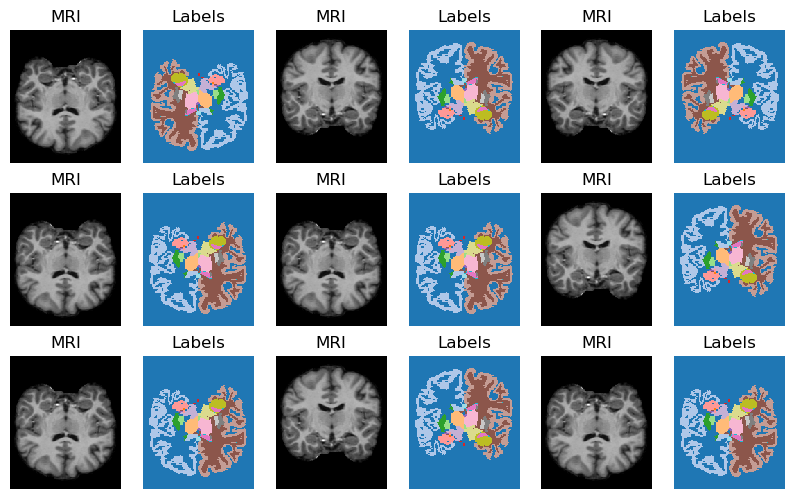

In [5]:
# random flip

xform = fov.RandomFlipTransform()


plt.figure(figsize=(10, 6))
for i in range(3*3):
    flip_dat, flip_lab = xform(dat, lab)
    plt.subplot(3, 6, 2*i+1)
    plt.imshow(flip_dat.squeeze(), cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.title('MRI')
    plt.subplot(3, 6, 2*i+2)
    plt.imshow(flip_lab.squeeze(), cmap='tab20', interpolation='nearest')
    plt.axis('off')
    plt.title('Labels')
plt.show()

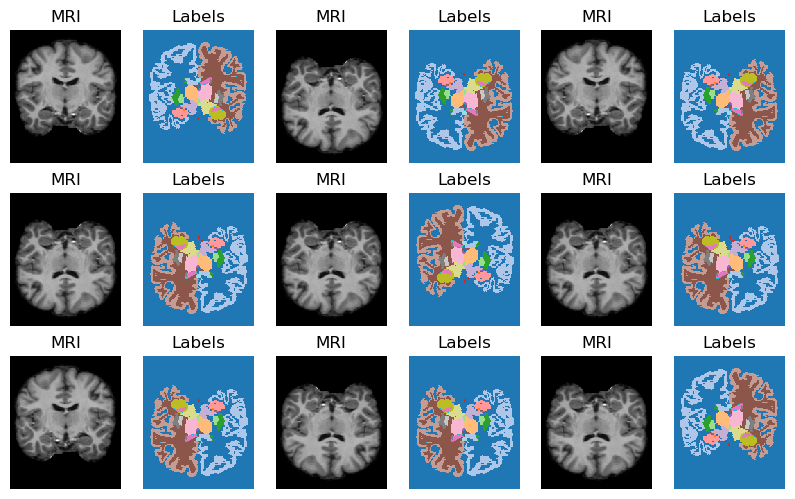

In [6]:
# random flip / different per tensor
xform = fov.RandomFlipTransform(shared='channels')


plt.figure(figsize=(10, 6))
for i in range(3*3):
    flip_dat, flip_lab = xform(dat, lab)
    plt.subplot(3, 6, 2*i+1)
    plt.imshow(flip_dat.squeeze(), cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.title('MRI')
    plt.subplot(3, 6, 2*i+2)
    plt.imshow(flip_lab.squeeze(), cmap='tab20', interpolation='nearest')
    plt.axis('off')
    plt.title('Labels')
plt.show()

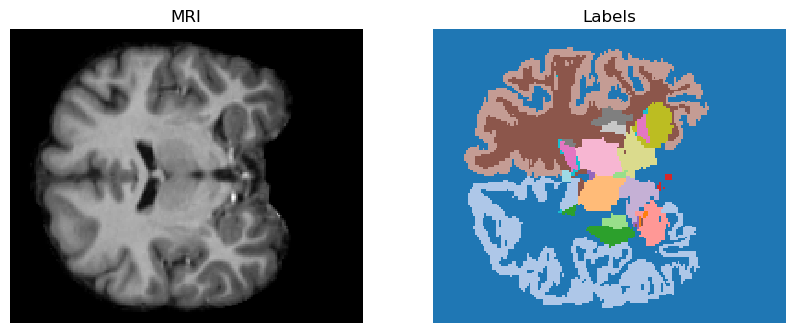

In [7]:
# Permute axes

xform = fov.PermuteAxesTransform()
perm_dat, perm_lab = xform(dat, lab)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(perm_dat.squeeze(), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('MRI')
plt.subplot(1, 2, 2)
plt.imshow(perm_lab.squeeze(), cmap='tab20', interpolation='nearest')
plt.axis('off')
plt.title('Labels')
plt.show()

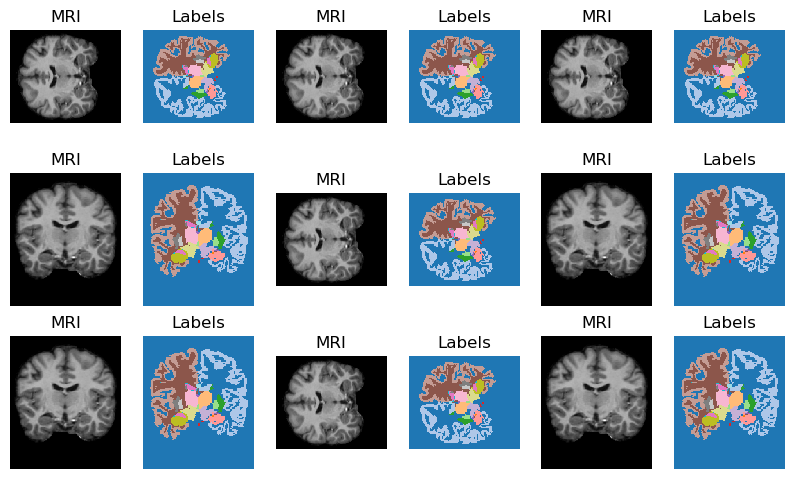

In [8]:
# random permutation
xform = fov.RandomPermuteAxesTransform()


plt.figure(figsize=(10, 6))
for i in range(3*3):
    perm_dat, perm_lab = xform(dat, lab)
    plt.subplot(3, 6, 2*i+1)
    plt.imshow(perm_dat.squeeze(), cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.title('MRI')
    plt.subplot(3, 6, 2*i+2)
    plt.imshow(perm_lab.squeeze(), cmap='tab20', interpolation='nearest')
    plt.axis('off')
    plt.title('Labels')
plt.show()

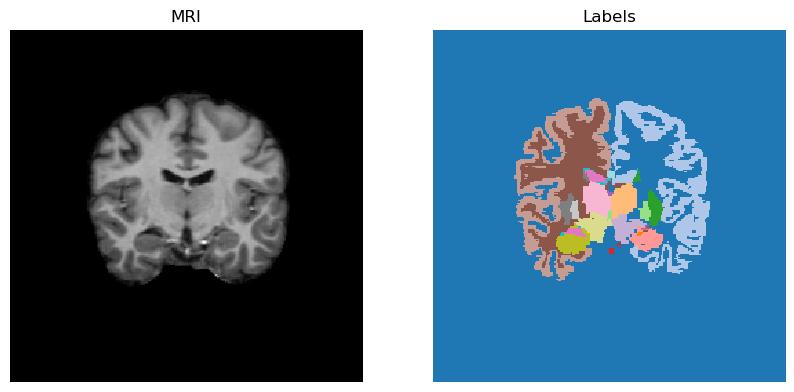

In [9]:
# Ensure size is a power of two

xform = fov.PowerTwoTransform(8, bound='zero')
dat2, lab2 = xform(dat, lab)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(dat2.squeeze(), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('MRI')
plt.subplot(1, 2, 2)
plt.imshow(lab2.squeeze(), cmap='tab20', interpolation='nearest')
plt.axis('off')
plt.title('Labels')
plt.show()

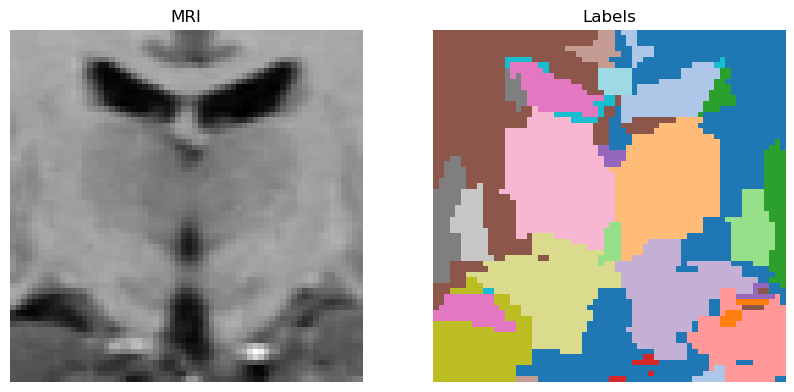

In [10]:
# Extract a patch

xform = fov.PatchTransform()
dat2, lab2 = xform(dat, lab)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(dat2.squeeze(), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('MRI')
plt.subplot(1, 2, 2)
plt.imshow(lab2.squeeze(), cmap='tab20', interpolation='nearest')
plt.axis('off')
plt.title('Labels')
plt.show()

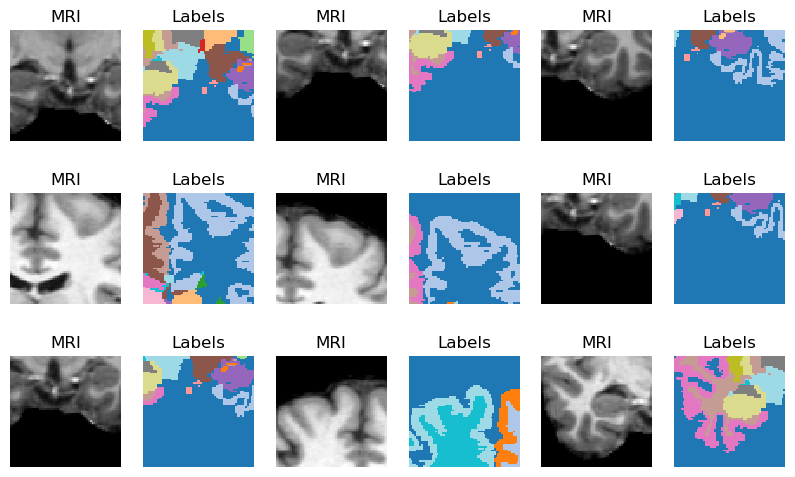

In [11]:
# Extract a random patch

xform = fov.RandomPatchTransform(64)

plt.figure(figsize=(10, 6))
for i in range(3*3):
    patch_dat, patch_lab = xform(dat, lab)
    plt.subplot(3, 6, 2*i+1)
    plt.imshow(patch_dat.squeeze(), cmap='gray', interpolation='nearest')
    plt.axis('off')
    plt.title('MRI')
    plt.subplot(3, 6, 2*i+2)
    plt.imshow(patch_lab.squeeze(), cmap='tab20', interpolation='nearest')
    plt.axis('off')
    plt.title('Labels')
plt.show()